In [43]:
import pandas as pd
import numpy as np
from plotnine import *
import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/AD YR 2/Website project/Scams in Canada')
os.getcwd()
rawdata = pd.read_csv('43c67af5-e598-4a9b-a484-fe1cb5d775b5.csv')


In [44]:
rawdata.head()

,Numero d'identification / Number ID,Date Received / Date recue,Complaint Received Type,Type de plainte recue,Country,Pays,Province/State,Province/Etat,Fraud and Cybercrime Thematic Categories,Categories thematiques sur la fraude et la cybercriminalite,...,Methode de sollicitation,Gender,Genre,Language of Correspondence,Langue de correspondance,Victim Age Range / Tranche d'age des victimes,Complaint Type,Type de plainte,Number of Victims / Nombre de victimes,Dollar Loss /pertes financieres
0,1,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Nova Scotia,Nouvelle-Écosse,Phishing,Hameçonnage,...,Messages texte,Female,Femme,English,Anglais,'30 - 39,Attempt,Tentative,0,$0.00
1,2,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,British Columbia,Colombie-Britanique,Identity Fraud,Fraude à l'identité,...,Autre/inconnu,Female,Femme,English,Anglais,'70 - 79,Victim,Victime,1,$0.00
2,3,2021-01-02,CAFC Website,CAFC site web,Not Specified,Non spécifié,Not Specified,Non spécifié,Romance,Romance,...,Autre/inconnu,Not Available,non disponible,Not Available,non disponible,'Not Available / non disponible,Victim,Victime,1,$298.00
3,4,2021-01-02,CAFC Website,CAFC site web,United States,États-Unis,California,Californie,Foreign Money Offer,Offre d’argent de l’étranger,...,Courrier,Male,Homme,English,Anglais,'60 - 69,Attempt,Tentative,0,$0.00
4,5,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Ontario,Ontario,Merchandise,Marchandise,...,Internet,Female,Femme,English,Anglais,'20 - 29,Victim,Victime,1,$50.00


In [45]:
rawdata.head()

rawdata = rawdata.drop(["Type de plainte recue",
                        "Categories thematiques sur la fraude et la cybercriminalite",
                        "Genre",
                        "Methode de sollicitation",
                        "Type de plainte",
                        "Langue de correspondance"],axis=1)

fraudData = rawdata.rename(columns={"Numero d'identification / Number ID": "Number ID", "Date Received / Date recue":"Date Received",
                                    "Victim Age Range / Tranche d'age des victimes":  "Victim Age Range",
                                    "Number of Victims / Nombre de victimes":"Number of Victims",
                                    "Dollar Loss /pertes financieres":"Dollar Loss",
                                    "Province/Etat":"Province",})

In [46]:
fraudData.head()

,Number ID,Date Received,Complaint Received Type,Country,Pays,Province/State,Province,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Language of Correspondence,Victim Age Range,Complaint Type,Number of Victims,Dollar Loss
0,1,2021-01-02,CAFC Website,Canada,Canada,Nova Scotia,Nouvelle-Écosse,Phishing,Text message,Female,English,'30 - 39,Attempt,0,$0.00
1,2,2021-01-02,CAFC Website,Canada,Canada,British Columbia,Colombie-Britanique,Identity Fraud,Other/unknown,Female,English,'70 - 79,Victim,1,$0.00
2,3,2021-01-02,CAFC Website,Not Specified,Non spécifié,Not Specified,Non spécifié,Romance,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Victim,1,$298.00
3,4,2021-01-02,CAFC Website,United States,États-Unis,California,Californie,Foreign Money Offer,Mail,Male,English,'60 - 69,Attempt,0,$0.00
4,5,2021-01-02,CAFC Website,Canada,Canada,Ontario,Ontario,Merchandise,Internet,Female,English,'20 - 29,Victim,1,$50.00


In [47]:
fraudData["Victim Age Range"].value_counts()

Victim Age Range
'Not Available / non disponible    93712
'30 - 39                           41255
'60 - 69                           36318
'40 - 49                           35907
'20 - 29                           33347
'50 - 59                           32915
'70 - 79                           22417
'10 - 19                            9620
'80 - 89                            7117
'90 - 99                             947
'1 - 9                               173
'Deceased / Décédé                   165
'100 +                                60
'Business / Entreprise                23
Name: count, dtype: int64

In [66]:
fraudData["Fraud and Cybercrime Thematic Categories"].value_counts()
#fraudData["Fraud and Cybercrime Thematic Categories"].value_counts().sum()

Fraud and Cybercrime Thematic Categories
Identity Fraud                                72417
Extortion                                     30228
Phishing                                      27458
Personal Info                                 25944
Service                                       23897
Investments                                   16709
Merchandise                                   16225
Bank Investigator                             13214
Counterfeit Merchandise                       13128
Job                                           12127
Vendor Fraud                                   9608
Other                                          9286
Unknown                                        8724
Emergency (Jail, Accident, Hospital, Help)     7422
Romance                                        5810
Spear Phishing                                 5645
Prize                                          4370
False Billing                                  1904
GRANT                  

In [62]:
senior_age_ranges = ["'40 - 49", "'50 - 59", "'60 - 69", "'70 - 79", "'80 - 89", "'90 - 99", "'100 +"]
seniorsData = fraudData[fraudData["Victim Age Range"].isin(senior_age_ranges)]
seniorsData.loc[:,"Date Received"] = pd.to_datetime(seniorsData["Date Received"])
daily_counts = seniorsData.groupby("Date Received").size().reset_index(name='Count')

fraudData.loc[:,"Date Received"] = pd.to_datetime(fraudData["Date Received"])

/Users/michael/myenv/lib/python3.13/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/Users/michael/myenv/lib/python3.13/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.


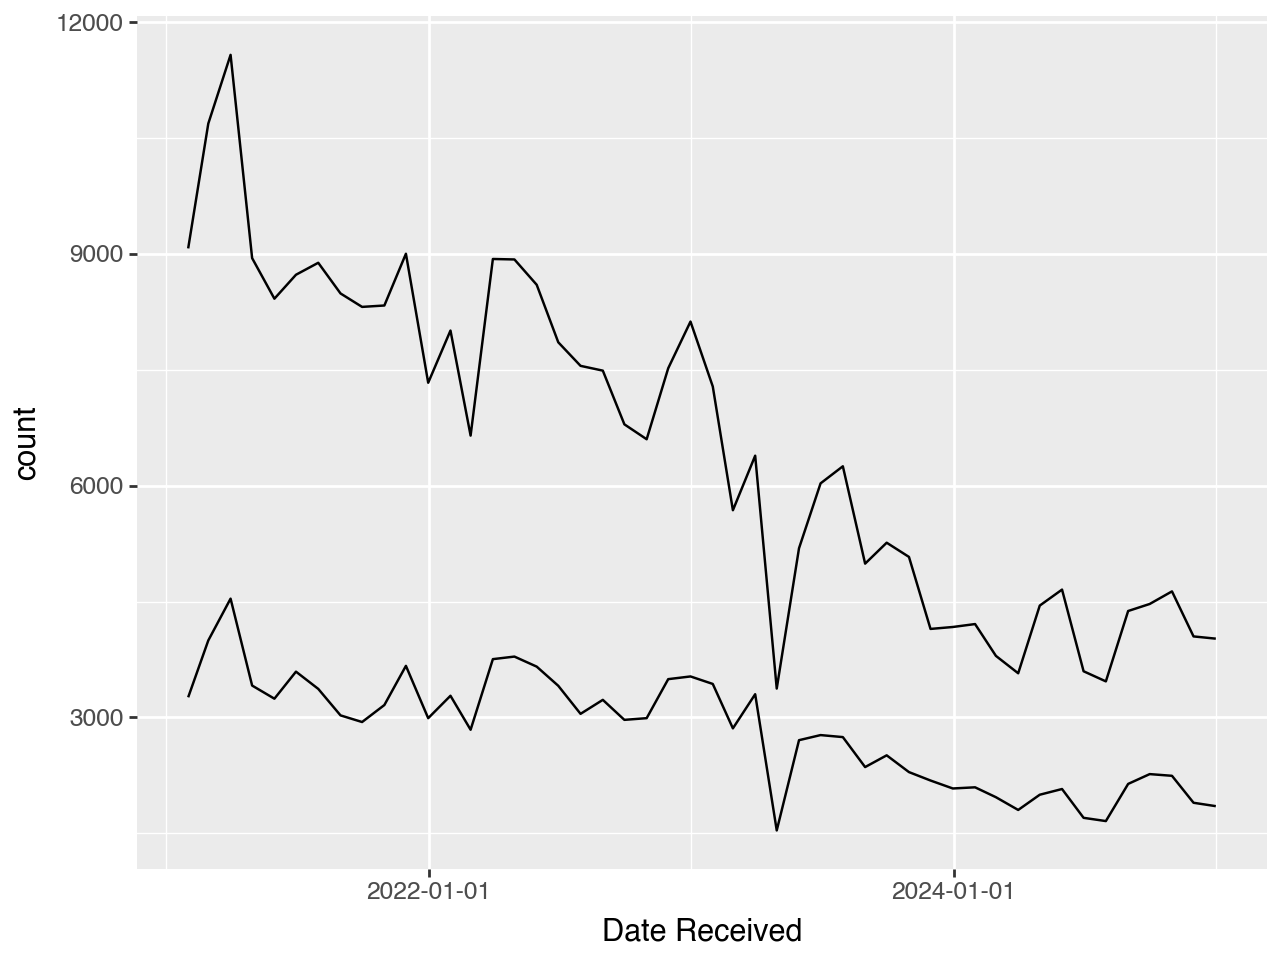

In [68]:
# Resample to monthly counts
monthlyCountsSenior = seniorsData.groupby(pd.Grouper(key='Date Received', freq='ME')).size().reset_index(name='count')
monthlyCountsTotal = fraudData.groupby(pd.Grouper(key='Date Received', freq='ME')).size().reset_index(name='count')
(ggplot()
 + geom_path(aes(x='Date Received', y='count'), data=monthlyCountsSenior)
 + geom_path(aes(x='Date Received', y='count'), data=monthlyCountsTotal)
 + theme_gray())

In [23]:
fraudData["Dollar Loss"].unique()

array(['$0.00', '$298.00', '$50.00', ..., '$5,566.76', '$81.48',
       '$732.50'], shape=(22792,), dtype=object)